# Intro

In this lab we will recap some key functionality of Scikit Learn and explore what it means that two classes are linearly separable.

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Vectors: 
[[-0.21456589 -0.32600538]
 [ 0.6292157   0.22004716]
 [ 0.75126135  1.26497331]
 [ 0.73503731 -0.38326352]
 [ 0.68073792  0.40748903]
 [ 1.17642252  1.03824434]
 [ 0.77779269  0.08732285]
 [-0.57188122  0.22044972]
 [ 0.00161614  1.16428127]
 [ 0.86152741  0.81846853]]
Labels: 
[0 0 1 0 1 1 0 0 1 1]


(-1, 2)

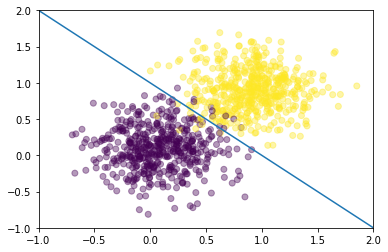

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.3,
                  n_features=2,
                  random_state=0)

print 'Vectors: \n', X[:10]
print 'Labels: \n', y[:10]

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.4)
plt.plot([-1, 2], [2, -1])
plt.xlim(-1, 2)
plt.ylim(-1, 2)

## Exercise 1:

Use your knowledge of scikit-learn to define a Logistic Regression model that separates the two classes and plot its decision boundary using the function below.

In [3]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)

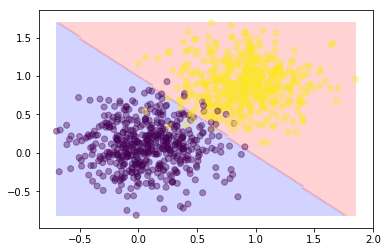

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X, y)
plot_decision_boundary(model, X, y)


## Exercise 2:
Ok, that worked! Easy!

Now let's make things a little harder.

- Try using Logistic regression to separate the data below
- Use a 3 fold cross validation to judge the model accuracy
- print the mean score and the standard deviation of the score
- try changing the value of the parameter C (regularization)

Is the score good or bad? Does the decision boundary correctly separate the data?

In [23]:
from sklearn.datasets import make_circle


X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.3,
                    random_state=0)


plt.scatter(X[:,0], X[:,1], c=y, alpha=0.4)

NameError: name 'score' is not defined

NameError: name 'score' is not defined

## Exercise 3:

Try to find a model in scikit-learn that actually works on this datasets.

- will any linear model work? (for example SGD or Perceptron)
- what other models could you try?
- plot the decision boundary as usual
- compare your results with the person next to you

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

sgd = SGDClassifier()
model = sgd.fit(X,y)
score = cross_val_score(model, X, y)
print 'mean = %s, stddev = %s' % (score.mean(), score.std())

svm_model = SVC().fit(X, y)
score = cross_val_score(svm_model, X, y)
print 'mean = %s, stddev = %s' % (score.mean(), score.std())



mean = 0.417147632446, stddev = 0.0652249321209
mean = 1.0, stddev = 0.0


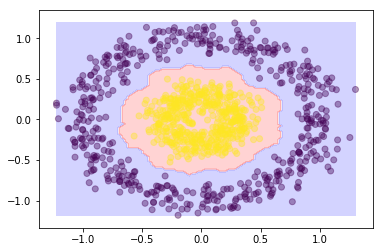

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
plot_decision_boundary(knn, X,y )

## Exercise 4

Open the [tensorflow playground](https://goo.gl/F5gncv) and try playing with parameters untill you get to a model that correctly separate the two classes.

- try changing the number of nodes
- try changing the number of hidden layers
- try changing the input features
- try changing the activation function
- try changing the regularization rate

Which changes make the model converge faster to a solution? Discuss with the person next to you.